Caution, most parameters are given in mm not m!
lam_mean 0.000533379564574
del_lam_mean_sys 1.44282828983e-06
del_lam_mean_stat 3.71230796205e-07
del_lam_mean_res is quadratic sum of sys and stat error, =  1.48982072008e-06
lambdas =  [ 0.00053364  0.0005328   0.00053308  0.00053371  0.00053367]
Einzelfehler = [  1.41915888e-06   1.42652821e-06   1.51589855e-06   1.42617915e-06
   1.42402153e-06]
grad_p1 0.0667682234064
del_grad_p1 0.000378583037182
grad_p2 0.0665897304818
del_grad_p2 0.000438567380449
grad_p3 0.0668866392677
del_grad_p3 0.000242965343302
grad_p 0.0667481977186
del_grad_p 0.000362720563373


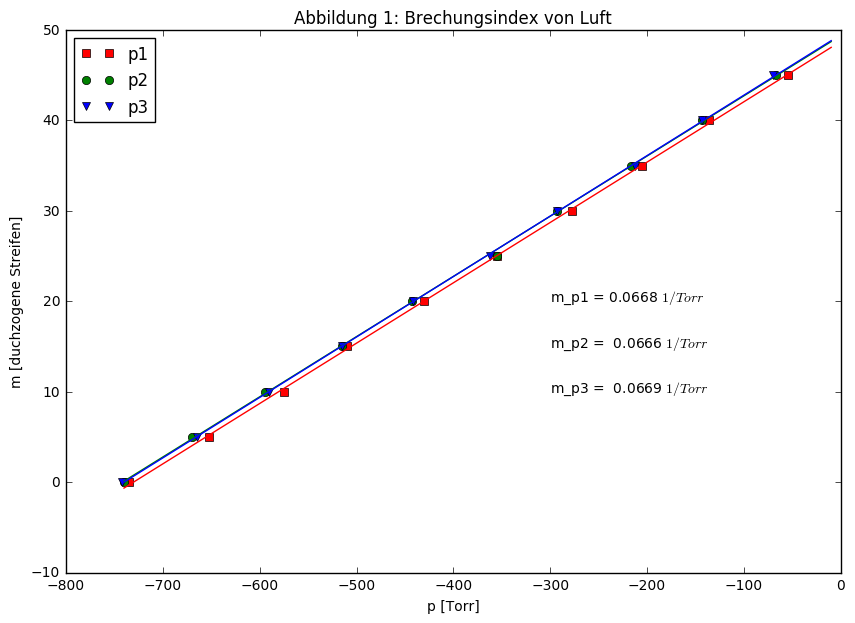

n0 1.00029345929
del_n0, using std_deviation for del_grad_p 1.81958660679e-06


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import pyplot
from scipy.optimize import curve_fit
from scipy import signal
from scipy import stats

###Part 3.3

#constant parameters
T0 = 273.15 # in K
p0 = 101325/133.322 #in Torr 1 Torr = 133.322 Pa
a = 50#in mm inner size of cuvette
del_a = 0.05#in mm
#measured parameters
sa = np.array([0.019
,0.020
,0.288
,0.100
,0.100
])#start position, five values in mm
se = np.array([3.029
,3.005
,3.100
,3.096
,3.100
])#endposition, five values in mm
del_s = np.array([0.00005,0.00005,0.00005,0.00005,0.00005])#total error (Halbe Skalenteilung) five values in mm
T = 273.15+23.1# Roomtemperature in K
del_T = 0.1#in K
m = np.array([11281,
11205
,10550
,11227
,11243
])#Counts, five values
del_m = 30

#calculate lambda
lam = 2*(se-sa)/m#array containing all lambdas
del_lam = lam*np.sqrt((del_s/(se-sa))**2+(del_m/m)**2)
lam_mean = 1/5 *np.sum(lam)#mean of lambda
del_lam_mean_sys = np.sqrt(1/5*(np.sum(del_lam**2)))
del_lam_mean_stat = np.sqrt(1/5*np.sum((lam_mean-lam)**2))
del_lam_mean_res = np.sqrt(del_lam_mean_sys**2 + del_lam_mean_stat**2)
print("Caution, most parameters are given in mm not m!")
print("lam_mean", lam_mean)
print("del_lam_mean_sys",del_lam_mean_sys)
print("del_lam_mean_stat",del_lam_mean_stat)
print("del_lam_mean_res is quadratic sum of sys and stat error, = ", del_lam_mean_res)
print("lambdas = ", lam)
print("Einzelfehler =", del_lam)


###part 3.4
#import counts and preassure from textfile, that contains the measurements
mint = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45]) 
p1 = np.array([735,652,575,510,430,355,278,205,136,55])
p2 = np.array([740,670,594,515,443,355,293,217,143,67]) 
p3 = np.array([742,665,590,515,442,362,293,213,143,70])

#correct sign of p because we measure -p but typed p into textfile
p1, p2, p3 = -p1, -p2, -p3

#calculate gradient
grad_p1, b1, r_value1, p_value1, std_err_p1 = stats.linregress(p1, mint)#gradient, y-axis-intercept,no-idea-what-that-is, same again, error that we search for
grad_p2, b2, r_value2, p_value2, std_err_p2 = stats.linregress(p2, mint)
grad_p3, b3, r_value3, p_value3, std_err_p3 = stats.linregress(p3, mint)
grad_p = abs(1/3*(grad_p1+grad_p2+ grad_p3))#took absolute gradient in case - p ist plotted

del_grad_p = np.sqrt(1/3*(std_err_p1**2+std_err_p2**2+std_err_p3**2))
print("grad_p1",grad_p1)
print("del_grad_p1",std_err_p1)
print("grad_p2",grad_p2)
print("del_grad_p2",std_err_p2)
print("grad_p3",grad_p3)
print("del_grad_p3",std_err_p3)
print("grad_p",grad_p)

print("del_grad_p",del_grad_p)

##fitcurve
def linear(x,m,c):
    return m*x+c

#plot data
x = np.arange(-740, 0, 10)
pl.figure(figsize=(10, 7))
plt.plot(p1, mint, label = "p1", marker= 's', color= 'red', linewidth=0)
plt.plot(p2, mint, label = "p2", marker= 'o', color= 'green', linewidth=0)
plt.plot(p3, mint, label = "p3", marker= 'v', color= 'blue', linewidth=0)
plt.legend(loc='upper left')
plt.xlabel("p [Torr]")
plt.ylabel (r"m [duchzogene Streifen]")
plt.title("Abbildung 1: Brechungsindex von Luft")
plt.text(-300, 20, (r'm_p1 = {Steigung} $1/Torr$ '.format(Steigung =  np.round(grad_p1,4))))
plt.text(-300, 15, (r"m_p2 =  {Steigung} $1/Torr$ ".format(Steigung = np.round(grad_p2,4))))
plt.text(-300, 10, (r"m_p3 =  {Steigung} $1/Torr$ ".format(Steigung = np.round(grad_p3,4))))
plt.plot(x, linear(x, grad_p1,b1), color = "red")
plt.plot(x, linear(x, grad_p2,b2), color = "green")
plt.plot(x, linear(x, grad_p3,b3), color = "blue")
plt.savefig('Brechungsindex.png', format= 'png')
plt.show()
plt.close()

#calculate refractive index n0
n0 = 1 + lam_mean/2/a*grad_p*p0/T0*T
del_n0 = np.sqrt((del_lam_mean_res/lam_mean)**2+(del_a/a)**2+ (del_grad_p/grad_p)**2+(del_T/T)**2)*(n0-1)

print("n0", n0)
print("del_n0, using std_deviation for del_grad_p", del_n0)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot
from scipy import signal
%matplotlib inline

In [23]:
data=np.genfromtxt('File.csv',delimiter=",",skip_header=2)  #Hier der Pfad zu Euren Daten eintragen

In [24]:
print(data)

[[-0.27728     0.                 nan]
 [-0.27724001  0.                 nan]
 [-0.27720001  0.                 nan]
 ..., 
 [ 0.37795997  0.                 nan]
 [ 0.37799999  0.                 nan]
 [ 0.37803999  0.                 nan]]


In [25]:
t=data[:,0:1] #Zeit
Int=data[:,1:2] #Intensitaet

In [26]:


print(t)
print(np.shape(t))



[[-0.27728   ]
 [-0.27724001]
 [-0.27720001]
 ..., 
 [ 0.37795997]
 [ 0.37799999]
 [ 0.37803999]]
(16384, 1)


In [27]:
print(Int)

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


In [28]:


Int=Int[:, 0] #in 1D-array wandeln
t=t[:, 0]



In [29]:


print(np.shape(Int))
print(np.shape(t))



(16384,)
(16384,)


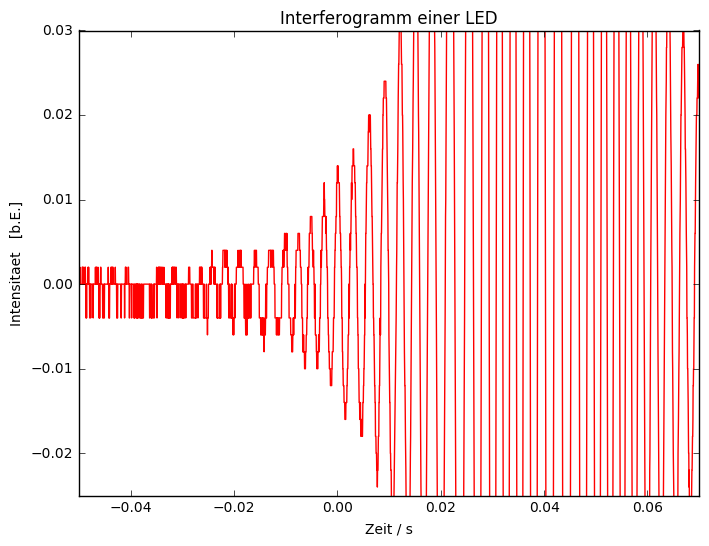

In [30]:
plt.figure(figsize=(8,6))
plt.plot(t,Int, color='red', linewidth=1)
plt.xlabel('Zeit / '+'s')
plt.ylabel('Intensitaet  '+' [b.E.]')
plt.title('Interferogramm einer LED')
plt.axis([-0.05, 0.07, -0.025, 0.03])
plt.savefig("InteferogrammLED.pdf")

In [31]:
plt.axis?

In [32]:
peakind = signal.find_peaks_cwt(Int, np.arange(1,200),noise_perc=20)

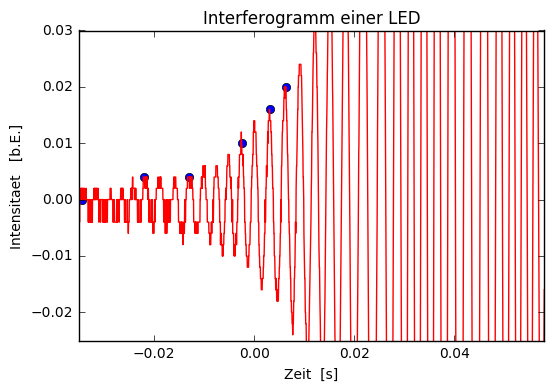

In [33]:
plt.plot(t[peakind], Int[peakind],marker='o',linewidth=0)
plt.plot(t,Int, color='red', linewidth=1)
plt.xlabel('Zeit  '+'[s]')
plt.ylabel('Intensitaet  '+' [b.E.]')
plt.title('Interferogramm einer LED')
plt.axis([-0.035, 0.058, -0.025, 0.03])
plt.savefig("Inteferowithpeaks.pdf")

In [34]:
#Fitfunktion Gauss
def fitFunc(t, a, mu, sig):
    return a/np.sqrt(2*np.pi)/sig*np.exp(-(t-mu)**2/(2*sig**2))

In [35]:


init_vals = [0.002, 0.032, 0.015]
fitParams, fitCovariances = curve_fit(fitFunc, t[peakind], Int[peakind],p0=init_vals)

print(fitParams)
print(fitCovariances)

[ 0.00576361  0.03982005  0.01411953]
[[  5.51821869e-09   1.93999134e-09   1.04774849e-08]
 [  1.93999134e-09   4.49618097e-08   7.21176987e-09]
 [  1.04774849e-08   7.21176987e-09   4.33088346e-08]]


kohaerenz 2.82390611479e-06
del_kohaerenz 1.2e-07


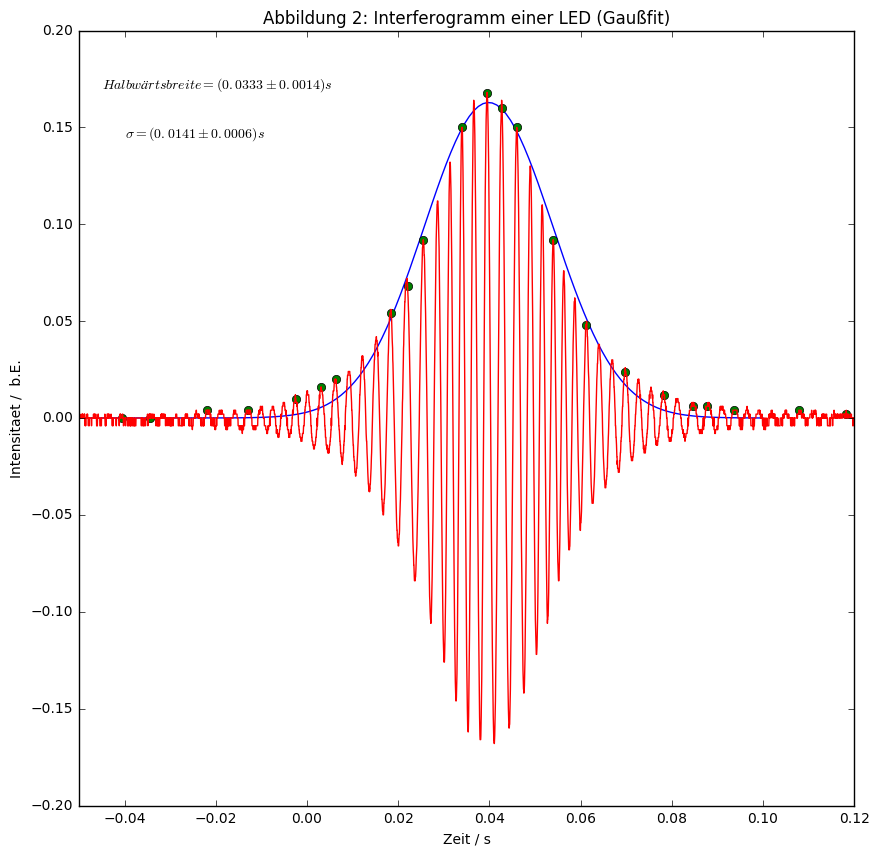

In [79]:

import pylab as pl

del_sig = np.round(np.sqrt(fitCovariances[1][1]),4)#used in string for text in plot
del_Hwb = np.round(2.355 * del_sig,4)

pl.figure(figsize=(10, 10))
x=np.linspace(-0.05,0.1,150) #x-Werte fuer die Fitfunktion 
plt.plot(x, fitFunc(x, fitParams[0], fitParams[1], fitParams[2]))
plt.plot(t[peakind], Int[peakind],marker='o', linewidth=0)
plt.plot(t,Int, color='red', linewidth=1)
plt.text(-0.04, 0.145, (r"$\sigma =  ({Sigma}\pm{del_sig}) s$ ".format(Sigma = np.round(fitParams[2],4), del_sig = del_sig)))
plt.text(-0.045, 0.17, (r"$Halbwärtsbreite =  ({Hwb}\pm {del_Hwb})s$ ".format(Hwb = np.round(2.355*fitParams[2],4), del_Hwb = del_Hwb)))
plt.xlabel('Zeit / '+'s')
plt.ylabel('Intensitaet / '+' b.E.')
plt.title('Abbildung 2: Interferogramm einer LED (Gaußfit)')
plt.axis([-0.05, 0.12, -0.2, 0.2])
#plt.savefig('Interferogramm1.pdf', format= 'PDF')
v = 0.1 #in mm/s velocity of mirrow 
kohaerenz = 2*fitParams[2]*v*1e-3#factor 2 because moving mirrow distance x causes the light to move 2x further
del_kohaerenz = 2*del_sig*v*1e-3
print("kohaerenz",kohaerenz)
print("del_kohaerenz", del_kohaerenz)
plt.savefig("Gaußfit.png", format= 'png')

In [49]:


print("Sigmabreite=",fitParams[2],"s")
print("Halbwertsbreite=",2.355*fitParams[2],"s")



Sigmabreite= 0.0141195305739 s
Halbwertsbreite= 0.0332514945016 s


In [50]:
L = 299792458*0.041376469181
print(L)


12404353.399133237


In [51]:
#Fitfunktion Lorentz
def lorentz(t, a, gamma, omega):
    return a/(2*np.pi)*gamma/((t-omega)**2+gamma**2/4)

In [52]:
init_vals = [0.002, 0.02, 0.035]
fitParamsLorentz, fitCovariances = curve_fit(lorentz, t[peakind], Int[peakind],p0=init_vals)

[-0.05, 0.12, -0.2, 0.2]

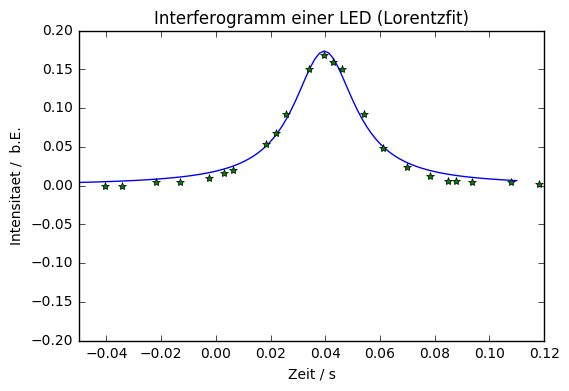

In [56]:


x=np.linspace(-0.06,0.11,100) #x-Werte fuer die Fitfunktion 
plt.plot(x, lorentz(x, fitParamsLorentz[0], fitParamsLorentz[1], fitParamsLorentz[2]))
plt.plot(t[peakind], Int[peakind],marker='*', linewidth=0)
plt.xlabel('Zeit / '+'s')
plt.ylabel('Intensitaet / '+' b.E.')
plt.title('Interferogramm einer LED (Lorentzfit)')
plt.axis([-0.05, 0.12, -0.2, 0.2])


In [54]:


print("Halbwertsbreite=",fitParamsLorentz[1],"s")



Halbwertsbreite= 0.0273955905462 s


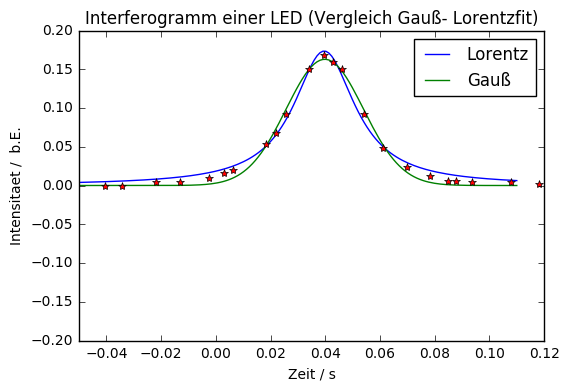

In [57]:


x=np.linspace(-0.05,0.11,150) #x-Werte fuer die Fitfunktion 
plt.plot(x, lorentz(x, fitParamsLorentz[0], fitParamsLorentz[1], fitParamsLorentz[2]),label="Lorentz")
plt.plot(x, fitFunc(x, fitParams[0], fitParams[1], fitParams[2]),label="Gauß")
plt.legend()
plt.plot(t[peakind], Int[peakind],marker='*', linewidth=0)
plt.xlabel('Zeit / '+'s')
plt.ylabel('Intensitaet / '+' b.E.')
plt.title('Interferogramm einer LED (Vergleich Gauß- Lorentzfit)')
plt.axis([-0.05, 0.12, -0.2, 0.2])

plt.savefig("InterferogrammLEDGaußLorenz.pdf")

In [44]:
ipython nbconvert to pdf notebook.ipynb 

SyntaxError: invalid syntax (<ipython-input-44-50174cfd8e91>, line 1)